In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('sharpening_data.csv');

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33953 entries, 0 to 33952
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   username        33912 non-null  float64
 1   first_name      33912 non-null  object 
 2   sharpened_date  33953 non-null  object 
 3   asset_no        33953 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.0+ MB


In [4]:
df = pd.DataFrame(dataset)

In [5]:
# Convert `sharpened_date` to datetime
df['sharpened_date'] = pd.to_datetime(df['sharpened_date'])

In [6]:
print(df)

       username first_name      sharpened_date   asset_no
0       12456.0      Angie 2020-09-10 11:32:40  TUKN60075
1       12456.0      Angie 2020-09-10 11:32:40  TUKN30070
2       12456.0      Angie 2020-09-10 11:32:40  TUKN60045
3       12456.0      Angie 2020-09-10 11:32:40  TUKN60008
4       12456.0      Angie 2020-09-10 11:32:40  TUKN60011
...         ...        ...                 ...        ...
33948   13337.0      Chris 2020-12-01 07:29:06  TUKN30797
33949   13337.0      Chris 2020-12-01 07:29:06  TUKN30799
33950   13337.0      Chris 2020-12-01 07:29:06  TUKN30772
33951   13337.0      Chris 2020-12-01 07:29:06  TUKN30770
33952   13337.0      Chris 2020-12-01 07:29:06  TUKN30773

[33953 rows x 4 columns]


In [7]:
# Feature 1: Number of Sharpenings per Employee
sharpening_counts = df.groupby('username').size().reset_index(name='num_sharpenings')

sharpening_counts




,username,num_sharpenings
0,1.0,75
1,2.0,10
2,559.0,1
3,1234.0,12
4,11656.0,440
5,12456.0,17878
6,12476.0,4921
7,13048.0,1302
8,13337.0,5892
9,14344.0,3381


In [8]:
# Feature 2: Time Interval between first and last sharpening events
sharpening_intervals = df.groupby('username').agg({
    'sharpened_date': ['min', 'max']
}).reset_index()
sharpening_intervals.columns = ['username', 'first_sharpening', 'last_sharpening']
sharpening_intervals['interval_days'] = (sharpening_intervals['last_sharpening'] - sharpening_intervals['first_sharpening']).dt.days

# Merge features
features = pd.merge(sharpening_counts, sharpening_intervals[['username', 'interval_days']], on='username')

print(features)

   username  num_sharpenings  interval_days
0       1.0               75             34
1       2.0               10             71
2     559.0                1              0
3    1234.0               12            152
4   11656.0              440             19
5   12456.0            17878            800
6   12476.0             4921            191
7   13048.0             1302            637
8   13337.0             5892            365
9   14344.0             3381            131


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize features
scaler = StandardScaler()
features[['num_sharpenings', 'interval_days']] = scaler.fit_transform(features[['num_sharpenings', 'interval_days']])



   username  num_sharpenings  interval_days  cluster
0       1.0        -0.630226      -0.786341        0
1       2.0        -0.642579      -0.645105        0
2     559.0        -0.644289      -0.916125        0
3    1234.0        -0.642199      -0.335913        0
4   11656.0        -0.560860      -0.843599        0
5   12456.0         2.753138       2.137626        1
6   12476.0         0.290730      -0.187042        0
7   13048.0        -0.397041       1.515424        0
8   13337.0         0.475264       0.477149        0
9   14344.0        -0.001938      -0.416074        0


Cluster Centers:
[[-0.30590427 -0.23751397]
 [ 2.7531384   2.13762569]]

Employee Clusters:
   username  num_sharpenings  interval_days  cluster
0       1.0        -0.630226      -0.786341        0
1       2.0        -0.642579      -0.645105        0
2     559.0        -0.644289      -0.916125        0
3    1234.0        -0.642199      -0.335913        0
4   11656.0        -0.560860      -0.843599        0
5   12456.0         2.753138       2.137626        1
6   12476.0         0.290730      -0.187042        0
7   13048.0        -0.397041       1.515424        0
8   13337.0         0.475264       0.477149        0
9   14344.0        -0.001938      -0.416074        0


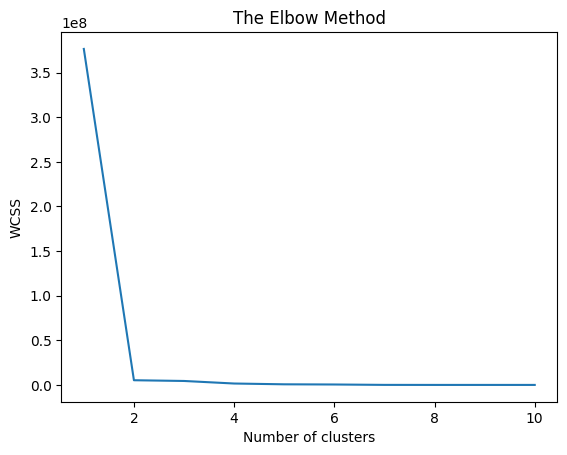

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
list1 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(features)
    list1.append(kmeans.inertia_)
plt.plot(range(1, 11), list1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
features['cluster'] = kmeans.fit_predict(features[['num_sharpenings', 'interval_days']])

print(features)


In [ ]:
# Print cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Print cluster assignments
print("\nEmployee Clusters:")
print(features)